# Project Brief
<br> The digital world is evolving, and so are Vanguard’s clients. Vanguard believed that a more intuitive and modern User Interface (UI), coupled with timely in-context prompts (cues, messages, hints, or instructions provided to users directly within the context of their current task or action), could make the online process smoother for clients. 
The critical question was: **Would these changes encourage more clients to complete the process?**

An A/B test was set into motion from 3/15/2017 to 6/20/2017 by the team.

Control Group: Clients interacted with Vanguard’s traditional online process.<br>
Test Group: Clients experienced the new, spruced-up digital interface.

Both groups navigated through an identical process sequence: an initial page, three subsequent steps, and finally, a confirmation page signaling process completion.<br>
**The goal is to see if the new design leads to a better user experience and higher process completion rates.**


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functions import *
import scipy.stats as st
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

import os

In [49]:
path1 = "df_final_demo.txt"
path2 = "df_final_experiment_clients.txt"
path3 = "df_final_web_data_pt_1.txt"
path4 = "df_final_web_data_pt_2.txt"

df_demo = pd.read_csv(path1)
df_exp = pd.read_csv(path2)
df_web_1 = pd.read_csv(path3)
df_web_2 = pd.read_csv(path4)

# Initial Exploration and Cleaning

## Demo dataset

In [50]:
print(f'The data set has {df_demo.shape[0]} rows and {df_demo.shape[1]} columns with the following types:')
print(df_demo.dtypes)
df_demo.sort_values(by = 'client_id', inplace = True)
df_demo.reset_index( drop=True, inplace= True)
df_demo.sample(5)

The data set has 70609 rows and 9 columns with the following types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
62809,8883014,16.0,192.0,39.0,F,2.0,73288.18,5.0,5.0
65160,9222610,28.0,342.0,53.5,M,2.0,93426.80,3.0,6.0
8024,1149058,11.0,140.0,56.5,M,3.0,37352.64,6.0,9.0
56025,7914344,12.0,147.0,33.5,M,2.0,20493.21,4.0,4.0
57162,8075801,6.0,82.0,29.0,U,2.0,50054.34,0.0,3.0


## Experiment dataset

In [51]:
print(f'The data set has {df_exp.shape[0]} rows and {df_exp.shape[1]} columns with the following types:')
print(df_exp.dtypes)
df_exp.sort_values(by = 'client_id', inplace = True)
df_exp.reset_index(drop = True, inplace = True)
df_exp.sample(5)

The data set has 70609 rows and 2 columns with the following types:
client_id     int64
Variation    object
dtype: object


,client_id,Variation
15837,2264956,Test
11513,1651717,Control
10071,1442929,Test
33807,4803076,Test
62048,8773702,Test


## Merging Demo and Expriment 

In [52]:
df=pd.merge(df_demo,df_exp, on='client_id')
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns with the following types:')
print(df.dtypes)
df.head(5)

The data set has 70609 rows and 10 columns with the following types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN
1,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test
2,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test
3,722,11.0,143.0,59.5,F,2.0,22466.17,1.0,1.0,NaN
4,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test


In [53]:
# null values
print(f'The number of null values in Demo_Expriment dataset:')
print(df.isna().sum())

#nunique 
print(f'\nThe number of unique values in Demo dataset:')
for column in df_demo.columns:
    print(f'column {column} has {df_demo[column].nunique()}')

# unique values for selected columns
df_col_unique = ['gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation']
print(f'\nUnique values in Demo_Expriment:')

for column in df_col_unique:
    unique_values = df[column].unique()
    print(f'column {column}: {unique_values}')

The number of null values in Demo_Expriment dataset:
client_id               0
clnt_tenure_yr         14
clnt_tenure_mnth       14
clnt_age               15
gendr                  14
num_accts              14
bal                    14
calls_6_mnth           14
logons_6_mnth          14
Variation           20109
dtype: int64

The number of unique values in Demo dataset:
column client_id has 70609
column clnt_tenure_yr has 54
column clnt_tenure_mnth has 482
column clnt_age has 165
column gendr has 4
column num_accts has 8
column bal has 70328
column calls_6_mnth has 8
column logons_6_mnth has 9

Unique values in Demo_Expriment:
column gendr: ['M' 'U' 'F' nan 'X']
column num_accts: [ 2.  3.  5.  4.  6.  8. nan  7.  1.]
column bal: [501570.72  25454.66  30525.8  ... 107059.74 431887.61  67425.35]
column calls_6_mnth: [ 4.  2.  0.  1.  6.  5.  3.  7. nan]
column logons_6_mnth: [ 4.  6.  1.  3.  9.  5.  8.  7.  2. nan]
column Variation: [nan 'Test' 'Control']


In [54]:
# initial analysis of numeric columns
print('\n')
df_numeric = df.select_dtypes(include=['number']).drop(columns = 'client_id')
numeric_col = list(df_numeric.columns)
df_numeric.describe().round(2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70595.00,70595.00,70594.00,70595.00,70595.00,70595.00,70595.00
mean,12.05,150.66,46.44,2.26,147445.24,3.38,5.57
std,6.87,82.09,15.59,0.53,301508.71,2.24,2.35
min,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,6.00,82.00,32.50,2.00,37346.84,1.00,4.00
50%,11.00,136.00,47.00,2.00,63332.90,3.00,5.00
75%,16.00,192.00,59.00,2.00,137544.90,6.00,7.00
max,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


### Cleaning process

In [55]:
# dropping of the dublications and handling NaN values in Gender and Variation columns
df_clean = cleaning_gender(df)
df_clean = drop_dub(df_clean)
df_clean =cleaning_Variation(df_clean)

In [56]:
df_clean.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr                0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
variation            0
dtype: int64

In [57]:
df_clean.describe(include='all').drop(columns = 'client_id').round(2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
count,70595.00,70595.00,70594.00,70609,70595.00,70595.00,70595.00,70595.00,70609
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,Test
freq,NaN,NaN,NaN,24139,NaN,NaN,NaN,NaN,26968
mean,12.05,150.66,46.44,NaN,2.26,147445.24,3.38,5.57,NaN
std,6.87,82.09,15.59,NaN,0.53,301508.71,2.24,2.35,NaN
min,2.00,33.00,13.50,NaN,1.00,13789.42,0.00,1.00,NaN
25%,6.00,82.00,32.50,NaN,2.00,37346.84,1.00,4.00,NaN
50%,11.00,136.00,47.00,NaN,2.00,63332.90,3.00,5.00,NaN
75%,16.00,192.00,59.00,NaN,2.00,137544.90,6.00,7.00,NaN


In [58]:
print(f'Mode for years : {df_clean.clnt_tenure_yr.mode()[0]}')
print(f'Mode for months : {df_clean.clnt_tenure_mnth.mode()[0]}')
print(f'Mode for age : {df_clean.clnt_age.mode()[0]}')
print(f'Mode for calls_6_mnth : {df_clean.calls_6_mnth.mode()[0]}')
print(f'Mode for logons_6_mnth : {df_clean.logons_6_mnth.mode()[0]}')

Mode for years : 6.0
Mode for months : 58.0
Mode for age : 58.5
Mode for calls_6_mnth : 6.0
Mode for logons_6_mnth : 9.0


In [59]:
#Based on the initial statistical analysis, missing values in some of our numeric columns were replaced with the median
df_clean= Null_Median(df_clean,'clnt_tenure_mnth')
df_clean= Null_Median(df_clean,'clnt_tenure_yr')
df_clean= Null_Median(df_clean,'clnt_age')
df_clean= Null_Median(df_clean,'calls_6_mnth')
df_clean= Null_Median(df_clean,'logons_6_mnth')

# We chose to drop the rows in the remaing two columns (num_accts and bal) which only have 14 NaN values each
df_clean.dropna(inplace=True, ignore_index=True)
df_clean.tail(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
70590,9999400,7.0,86.0,28.5,U,2.0,51787.04,0.0,3.0,Test
70591,9999626,9.0,113.0,35.0,M,2.0,36642.88,6.0,9.0,Test
70592,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
70593,9999832,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,Test
70594,9999839,13.0,160.0,28.5,F,2.0,67425.35,3.0,3.0,Unknown


In [60]:
df_clean = convert_float_to_int(df_clean,'logons_6_mnth')
df_clean = convert_float_to_int(df_clean,'calls_6_mnth')
df_clean = convert_float_to_int(df_clean,'clnt_tenure_yr')
df_clean = convert_float_to_int(df_clean,'clnt_tenure_mnth')
df_clean = convert_float_to_int(df_clean,'num_accts')
df_clean.dtypes

client_id             int64
clnt_tenure_yr        int64
clnt_tenure_mnth      int64
clnt_age            float64
gendr                object
num_accts             int64
bal                 float64
calls_6_mnth          int64
logons_6_mnth         int64
variation            object
dtype: object

In [61]:
print(f'The data set has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns with the following types:')
print(df_clean.dtypes)
print(df_clean.isna().sum())

The data set has 70595 rows and 10 columns with the following types:
client_id             int64
clnt_tenure_yr        int64
clnt_tenure_mnth      int64
clnt_age            float64
gendr                object
num_accts             int64
bal                 float64
calls_6_mnth          int64
logons_6_mnth         int64
variation            object
dtype: object
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
dtype: int64


In [62]:
df_clean.describe(include='all').drop(columns='client_id').round(2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
count,70595.00,70595.00,70595.00,70595,70595.00,70595.00,70595.00,70595.00,70595
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,Test
freq,NaN,NaN,NaN,24125,NaN,NaN,NaN,NaN,26961
mean,12.05,150.66,46.44,NaN,2.26,147445.24,3.38,5.57,NaN
std,6.87,82.09,15.59,NaN,0.53,301508.71,2.24,2.35,NaN
min,2.00,33.00,13.50,NaN,1.00,13789.42,0.00,1.00,NaN
25%,6.00,82.00,32.50,NaN,2.00,37346.84,1.00,4.00,NaN
50%,11.00,136.00,47.00,NaN,2.00,63332.90,3.00,5.00,NaN
75%,16.00,192.00,59.00,NaN,2.00,137544.90,6.00,7.00,NaN


## Web dataset

#### Merging the Web datasets

In [63]:
print(df_web_1.shape)
df_web_1.head(2)

(343141, 5)


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51


In [64]:
print(df_web_2.shape)
df_web_2.tail(2)

(412264, 5)


,client_id,visitor_id,visit_id,process_step,date_time
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34
412263,674799,947159805_81558194550,86152093_47511127657_716022,start,2017-06-03 12:17:09


In [65]:
# merging the 2 datasets
df_web = pd.concat([df_web_1,df_web_2 ])

In [66]:
df_web.sort_values(by='client_id', inplace = True)
df_web.reset_index(drop= True, inplace= True)
print(f'The data set has {df_web.shape[0]} rows and {df_web.shape[1]} columns with the following types:')
print(df_web.dtypes)

The data set has 755405 rows and 5 columns with the following types:
client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object


In [67]:
# unique values 
print(f'\nThe number of unique values in Web dataset:')
for column in df_web.columns:
    print(f'column {column} has {df_web[column].nunique()}')
    
unique_values_web = df_web.process_step.unique()
print(f'\ncolumn process_step has : {unique_values_web} as Unique values')


The number of unique values in Web dataset:
column client_id has 120157
column visitor_id has 130236
column visit_id has 158095
column process_step has 5
column date_time has 629363

column process_step has : ['step_3' 'confirm' 'step_2' 'step_1' 'start'] as Unique values


In [68]:
df_web.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [22]:
df_web.describe(include='object')

,visitor_id,visit_id,process_step,date_time
count,755405,755405,755405,755405
unique,130236,158095,5,629363
top,722943003_3441581446,875138661_34710212496_881092,start,2017-05-02 10:08:31
freq,104,104,243945,24


In [69]:
df_web.groupby('client_id').count().sort_values(by='visit_id', ascending=False)

,visitor_id,visit_id,process_step,date_time
client_id,,,,
5574879,111,111,111,111
2274658,90,90,90,90
2128341,84,84,84,84
1595223,81,81,81,81
5951379,81,81,81,81
...,...,...,...,...
5294883,1,1,1,1
6334724,1,1,1,1
3259983,1,1,1,1


In [70]:
df_web_clean=df_web.copy()

# Converting the fromats, dropping the dublicates
df_web_clean['date_time'] = pd.to_datetime(df_web_clean['date_time'])
df_web_clean.drop_duplicates().reset_index(drop=True, inplace=True)
df_web_clean.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [71]:
df_web_clean.tail(3)

,client_id,visitor_id,visit_id,process_step,date_time
755402,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
755403,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28
755404,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47


In [72]:
df_web_clean[df_web_clean.visit_id =='100019538_17884295066_43909'].sort_values(by= 'date_time', ascending= False)
df_web_clean[df_web_clean.visitor_id =='483112224_46340533900'].sort_values(by= 'date_time', ascending= False)
df_web_clean[(df_web_clean.client_id == 5574879) ].groupby(['visit_id','visitor_id','process_step']).count()

client_id  \
visit_id                     visitor_id           process_step              
275082714_55557368423_975860 837958338_6079136567 confirm               1   
                                                  start                 2   
                                                  step_1                2   
                                                  step_2                1   
                                                  step_3                1   
875138661_34710212496_881092 722943003_3441581446 confirm              16   
                                                  step_1               40   
                                                  step_2               24   
                                                  step_3               24   

                                                                date_time  
visit_id                     visitor_id           process_step             
275082714_55557368423_975860 837958338_6079136567 confirm               1  
                                                  start                 2  
                                                  step_1                2  
                                                  step_2                1  
                                                  step_3                1  
875138661_34710212496_881092 722943003_3441581446 confirm              16  
                                                  step_1               40  
                                                  step_2               24  
                                                  step_3               24

# Client Behavior Analysis
Who are the primary clients using this online process?<br>
Are the primary clients younger or older, new or long-standing?<br>
Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.


In [73]:
#Who are the primary clients using this online process?
visit_frequency = df_web_clean[['client_id']].value_counts().reset_index()
# selecting the 100 top clients providing a representative sample of highly engaged client 
primary_clients = visit_frequency.head(100)
top_visitor_df = pd.merge(primary_clients, df_clean, on='client_id')

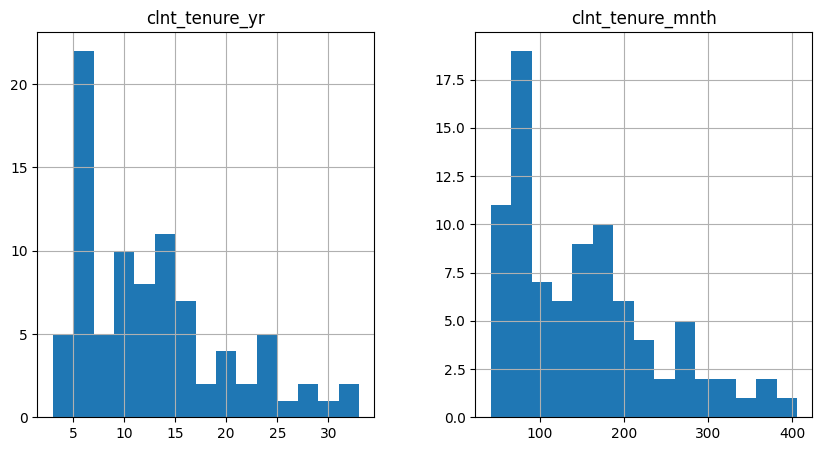

In [74]:
columns_to_plot = ['clnt_tenure_yr', 'clnt_tenure_mnth']
top_visitor_df[columns_to_plot].hist(figsize=(10,5), bins=15, xlabelsize=10, ylabelsize=10)
plt.show()

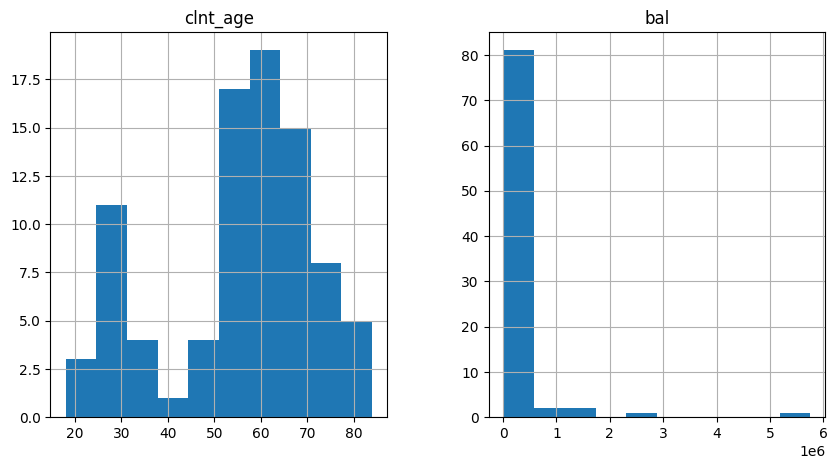

In [75]:
columns_to_plot = ['clnt_age' , 'bal']
top_visitor_df[columns_to_plot].hist(figsize=(10,5), bins=10, xlabelsize=10, ylabelsize=10)
plt.show()

# Performance Metrics KPI

### 1 - Completion Rate

##### Completion Rate: control and test groups - method 1

In [76]:
# adding variation column
variation_df = df_clean[['client_id','variation']]
web_clean_variation = pd.merge(df_web_clean,variation_df, on= 'client_id')
web_clean_variation_drop = web_clean_variation[web_clean_variation.variation != 'Unknown']

In [77]:
completion_rate_df = web_clean_variation_drop.copy()

completion_rate_df['success:1_failure:0'] = (completion_rate_df['process_step'] == 'confirm').astype(int)
print("let's check the values for client 1336 who has several confrimations:")
display(completion_rate_df[completion_rate_df.client_id ==1336])
print("Therefore, to determine the total number of clients who completed the steps, we need to count the unique values for each client.\n")

# unique number of sucessfull clients
num_clients_confirm = completion_rate_df[completion_rate_df['success:1_failure:0'] == 1].groupby('variation')['client_id'].nunique().reset_index(name='num_clients_confirm')

# unique number of total clients
total_clients = completion_rate_df.groupby('variation')['client_id'].nunique().reset_index(name='total_clients')

# Merging 
completion_rate_table = pd.merge(total_clients, num_clients_confirm, on='variation')

#adding completion rates
completion_rate_table['num_clients_fail'] =  completion_rate_table['total_clients']- completion_rate_table['num_clients_confirm']
completion_rate_table['completion_rate'] = round((completion_rate_table['num_clients_confirm'] / completion_rate_table['total_clients']) * 100,2)
print("The proportion of users who reach the final ‘confirm’ step:")
completion_rate_table

let's check the values for client 1336 who has several confrimations:


,client_id,visitor_id,visit_id,process_step,date_time,variation,success:1_failure:0
55,1336,920624746_32603333901,614001770_19101025926_112779,confirm,2017-05-08 08:21:38,Test,1
56,1336,920624746_32603333901,583743392_96265099036_939815,start,2017-05-08 06:05:12,Test,0
57,1336,920624746_32603333901,614001770_19101025926_112779,confirm,2017-05-08 08:23:00,Test,1
58,1336,920624746_32603333901,583743392_96265099036_939815,step_1,2017-05-08 06:05:37,Test,0
59,1336,920624746_32603333901,583743392_96265099036_939815,step_2,2017-05-08 06:06:03,Test,0
60,1336,920624746_32603333901,583743392_96265099036_939815,step_3,2017-05-08 06:06:54,Test,0
61,1336,920624746_32603333901,583743392_96265099036_939815,confirm,2017-05-08 06:08:43,Test,1


Therefore, to determine the total number of clients who completed the steps, we need to count the unique values for each client.

The proportion of users who reach the final ‘confirm’ step:


,variation,total_clients,num_clients_confirm,num_clients_fail,completion_rate
0,Control,23527,15429,8098,65.58
1,Test,26961,18682,8279,69.29


##### Completion Rate: control and test groups - method 2

In [78]:
# double checking our calclulations:
#calculation of Completion rate for the test group
num_user_confirm_test= web_clean_variation_drop[(web_clean_variation_drop.process_step == 'confirm') & (web_clean_variation_drop.variation == 'Test')]['client_id'].nunique()
total_users_test = web_clean_variation_drop[web_clean_variation_drop.variation == 'Test']['client_id'].nunique()
completion_rate_test = round((num_user_confirm_test / total_users_test)*100,2)

print(f'The number of users in test group who reached the confirm step is {num_user_confirm_test} and the number of total test sample is {total_users_test}')
print (f'The completion rate in test group is {completion_rate_test}')


The number of users in test group who reached the confirm step is 18682 and the number of total test sample is 26961
The completion rate in test group is 69.29


In [79]:
# calculation of the Completion rate for the control group 
num_user_confirm_control= web_clean_variation_drop[(web_clean_variation_drop.process_step == 'confirm') & (web_clean_variation_drop.variation == 'Control')]['client_id'].nunique()
total_users_Control = web_clean_variation_drop[web_clean_variation_drop.variation == 'Control']['client_id'].nunique()
completion_rate_Control = round((num_user_confirm_control / total_users_Control)*100,2)
print(f'The number of users in test group who reached the confirm step is {num_user_confirm_control} and the number of total control sample is {total_users_Control}')
print (f'The completion rate in control group is {completion_rate_Control}')

The number of users in test group who reached the confirm step is 15429 and the number of total control sample is 23527
The completion rate in control group is 65.58


### 2- Time Spent on Each Step

In [80]:
#sortign the dataset
web_clean_variation_drop_time= web_clean_variation_drop.sort_values(by=['client_id','visitor_id','visit_id','date_time']).copy()
# preparing the dataset for calculation 
web_clean_variation_drop_time['end_of_the_step']= web_clean_variation_drop_time.groupby('visit_id')['date_time'].shift(-1)
web_clean_variation_drop_time['time_diff'] = (web_clean_variation_drop_time['end_of_the_step'] - web_clean_variation_drop_time['date_time']).dt.round('ms')

#### Calculatuoin of time for all the users of web dataset

In [81]:
df_web_clean_sorted = df_web_clean.sort_values(by=['client_id','visitor_id','visit_id','date_time']).copy()
df_web_clean_sorted['end_of_the_step']= df_web_clean_sorted.groupby('visit_id')['date_time'].shift(-1)
#  time differences 
df_web_clean_sorted['time_diff'] = (df_web_clean_sorted['end_of_the_step'] - df_web_clean_sorted['date_time']).dt.round('ms')
# calculation of the avg
time_spent_all_users = df_web_clean_sorted.groupby(['visit_id', 'process_step'])[['time_diff']].mean().rename(columns={'time_diff': 'average_time_all_users'}).reset_index()
time_spent_all_users = time_spent_all_users.groupby('process_step')[['average_time_all_users']].mean()
time_spent_all_users

,average_time_all_users
process_step,
confirm,0 days 00:02:49.124611727
start,0 days 00:00:46.156719199
step_1,0 days 00:00:51.772076764
step_2,0 days 00:01:34.471705826
step_3,0 days 00:02:04.595826566


#### Calculatuoin of time for those who reached the confrim step

In [82]:
# making a dataset out of the clients that reached the confrim step
client_ids_reaching_confirmation = np.unique(df_web_clean_sorted[df_web_clean_sorted['process_step']=="confirm"]['client_id'].values)
time_spent_fil_confirm = df_web_clean_sorted[df_web_clean_sorted['client_id'].isin(client_ids_reaching_confirmation)]

# average time calculation
time_spent_fil_confirm = time_spent_fil_confirm.groupby(['visit_id', 'process_step'])[['time_diff']].mean().rename(columns={'time_diff': 'average_time_reaching_confrim'}).reset_index()
time_spent_fil_confirm = time_spent_fil_confirm.groupby('process_step')[['average_time_reaching_confrim']].mean()
time_spent_fil_confirm

,average_time_reaching_confrim
process_step,
confirm,0 days 00:02:49.124611727
start,0 days 00:00:40.969255647
step_1,0 days 00:00:48.513666540
step_2,0 days 00:01:33.678038545
step_3,0 days 00:01:57.597039995


#### Calculatuoin of average time  and std for Test group

In [83]:
# droping confirm becasue confirm is end of the process - whenever confrim to start means a new process -  confirm error is only 70 and statistically not important
web_clean_variation_time_test = web_clean_variation_drop_time[(web_clean_variation_drop_time.variation == 'Test') & (web_clean_variation_drop_time['process_step'] != 'confirm') ]
web_clean_variation_time_test = web_clean_variation_time_test.groupby(['visit_id', 'process_step'])[['time_diff']].mean().rename(columns={'time_diff': 'average_time_test_group'}).reset_index()
web_clean_variation_time_test['average_time_test_group_seconds'] = web_clean_variation_time_test['average_time_test_group'].apply(lambda x: x.total_seconds())

time_mean_test = web_clean_variation_time_test.groupby('process_step')[['average_time_test_group_seconds']].mean().rename(columns = {'average_time_test_group_seconds': 'Test_AvgTimeSeconds'})
std_mean_test = web_clean_variation_time_test.groupby('process_step')[['average_time_test_group_seconds']].std().rename(columns = {'average_time_test_group_seconds': 'Test_StdTime'})

print(time_mean_test,'\n\n\n',std_mean_test)

              Test_AvgTimeSeconds
process_step                     
start                   47.094759
step_1                  52.439394
step_2                  91.188150
step_3                 119.983001 


               Test_StdTime
process_step              
start           117.262308
step_1           85.906634
step_2           97.281597
step_3          190.638077


#### Calculatuoin of average time  and std for Control group

In [84]:
# droping confirm becasue confirm is end of the process - whenever confrim to start means a new process -  confirm error is only 70 and statistically not important

web_clean_variation_time_control = web_clean_variation_drop_time[(web_clean_variation_drop_time.variation == 'Control') & (web_clean_variation_drop_time['process_step'] != 'confirm') ]
web_clean_variation_time_control = web_clean_variation_time_control.groupby(['visit_id', 'process_step'])[['time_diff']].mean().rename(columns={'time_diff': 'average_time_control_group'}).reset_index()
web_clean_variation_time_control['average_time_control_group_seconds'] = web_clean_variation_time_control['average_time_control_group'].apply(lambda x: x.total_seconds())

time_mean_control = web_clean_variation_time_control.groupby('process_step')[['average_time_control_group_seconds']].mean().rename(columns = {'average_time_control_group_seconds': 'Control_AvgTimeSeconds'})
std_mean_control = web_clean_variation_time_control.groupby('process_step')[['average_time_control_group_seconds']].std().rename(columns = {'average_time_control_group_seconds': 'Control_StdTime'})


print(time_mean_control,'\n\n\n',std_mean_control)

              Control_AvgTimeSeconds
process_step                        
start                      50.317764
step_1                     45.736509
step_2                     97.065854
step_3                    136.174075 


               Control_StdTime
process_step                 
start              116.806644
step_1             104.498973
step_2             187.061485
step_3             186.369216


In [85]:
web_clean_variation_drop_time['time_diff_seconds'] = web_clean_variation_drop_time['time_diff'].dt.total_seconds()
Time_perStep_test = web_clean_variation_time_test.average_time_test_group.mean()
Time_perStep_control = web_clean_variation_time_control.average_time_control_group.mean()
Time_perStep_test=Time_perStep_test.total_seconds()
Time_perStep_control = Time_perStep_control.total_seconds()
print ('Average time spent on the whole process for the test group in second is :', round(time_mean_test.iloc[0]+time_mean_test.iloc[1]+time_mean_test.iloc[2]+time_mean_test.iloc[3],2))
print ('Average time spent per step for the test group is :', Time_perStep_test)
print ('\nAverage time spent per step for the control group is :', Time_perStep_control)
print ('Average time spent on the whole process for the control group in second is :', round(time_mean_control.iloc[0]+time_mean_control.iloc[1]+time_mean_control.iloc[2]+time_mean_control.iloc[3],2))


Average time spent on the whole process for the test group in second is : Test_AvgTimeSeconds    310.71
dtype: float64
Average time spent per step for the test group is : 73.907973

Average time spent per step for the control group is : 77.051528
Average time spent on the whole process for the control group in second is : Control_AvgTimeSeconds    329.29
dtype: float64


### 3 - Error Rates
If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [86]:
web_clean_variation_drop_time_error = web_clean_variation_drop_time.sort_values(by=['client_id','visitor_id','visit_id','date_time'])
web_clean_variation_drop_time_error['next_step']= web_clean_variation_drop_time_error.groupby(['visit_id','client_id','visitor_id'])['process_step'].shift(-1)


# changing the steps to numbers
steps = {
    'start': 1,
    'step_1': 2,
    'step_2': 3,
    'step_3': 4,
    'confirm': 5,
    np.nan: np.nan
}
web_clean_variation_drop_time_error['current_stp_nr'] = web_clean_variation_drop_time_error['process_step'].map(steps)
web_clean_variation_drop_time_error['next_stp_nr'] = web_clean_variation_drop_time_error['next_step'].map(steps)
web_clean_variation_drop_time_error['error'] = web_clean_variation_drop_time_error['next_stp_nr'] - web_clean_variation_drop_time_error['current_stp_nr']

# calculating the errors
condition = (web_clean_variation_drop_time_error['error'] <= -1) & (web_clean_variation_drop_time_error['error'] != -4)
web_clean_variation_drop_time_error['sum_er'] = condition.astype(int)
#client_ids_reaching_confirmation = np.unique(df_web_clean_sorted[df_web_clean_sorted['process_step']=="confirm"]['client_id'].values)
#time_spent_fil_confirm = df_web_clean_sorted[df_web_clean_sorted['client_id'].isin(client_ids_reaching_confirmation)]

clients_with_error = np.unique(web_clean_variation_drop_time_error[web_clean_variation_drop_time_error.sum_er ==1]['client_id'].values)
web_clean_variation_drop_time_error.reset_index(drop=True, inplace=True)

In [87]:
#tracking error occurrences
total_errors_test_group = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error.variation == 'Test'].groupby(['process_step'])[['sum_er']].sum().rename(columns = {'sum_er':'total_errors_test_group'})
total_step_test_group = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error.variation == 'Test']['sum_er'].count()
total_errors_test_group['error_percentage_test_group'] = round((total_errors_test_group['total_errors_test_group'] / total_step_test_group) * 100,2)
total_errors_test_group

,total_errors_test_group,error_percentage_test_group
process_step,,
confirm,70,0.04
start,0,0.00
step_1,6393,3.60
step_2,4782,2.69
step_3,4746,2.67


In [88]:
total_errors_control_group = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error.variation == 'Control'].groupby(['process_step'])[['sum_er']].sum().rename(columns = {'sum_er':'total_errors_control_group'})
total_step_control_group = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error.variation == 'Control']['sum_er'].count()
total_errors_control_group['error_percentage_control_group'] = round((total_errors_control_group['total_errors_control_group'] / total_step_control_group) * 100,2)

In [89]:
total_errors_control_group

,total_errors_control_group,error_percentage_control_group
process_step,,
confirm,218,0.15
start,0,0.00
step_1,2494,1.74
step_2,2166,1.51
step_3,4240,2.96


In [90]:
Error_table = pd.merge(total_errors_test_group, total_errors_control_group, on='process_step')
Error_table

,total_errors_test_group,error_percentage_test_group,total_errors_control_group,error_percentage_control_group
process_step,,,,
confirm,70,0.04,218,0.15
start,0,0.00,0,0.00
step_1,6393,3.60,2494,1.74
step_2,4782,2.69,2166,1.51
step_3,4746,2.67,4240,2.96


In [91]:
# test group
Test_clients_with_error =  web_clean_variation_drop_time_error[(web_clean_variation_drop_time_error.variation == 'Test') & (web_clean_variation_drop_time_error.client_id.isin(clients_with_error))]
Number_Test_client_Error = Test_clients_with_error.client_id.nunique()
Number_Test_client_NoError= total_users_test - Number_Test_client_Error
Ratio_test_error = round((Number_Test_client_Error/total_users_test)*100, 2)
print('The number of clients in Test Group who hit an error is: ',Number_Test_client_Error ,'the total number of the group is: ', total_users_test,'the ratio is: ',Ratio_test_error)
print('The  ratio of clients in Test Group who did not hit an error is: ',100 - Ratio_test_error )

# control group
Control_clients_with_error =  web_clean_variation_drop_time_error[(web_clean_variation_drop_time_error.variation == 'Control') & (web_clean_variation_drop_time_error.client_id.isin(clients_with_error))]
Number_Control_client_Error = Control_clients_with_error.client_id.nunique()
Ratio_Control_error = round((Number_Control_client_Error/total_users_Control)*100, 2)
print('The number of clients in Control Group who hit an error is: ',Number_Control_client_Error ,'the total number of the group is: ', total_users_Control,'the ratio is: ',Ratio_Control_error)
print('The  ratio of clients in Control Group who did not hit an error is: ',100 - Ratio_Control_error )


The number of clients in Test Group who hit an error is:  8857 the total number of the group is:  26961 the ratio is:  32.85
The  ratio of clients in Test Group who did not hit an error is:  67.15
The number of clients in Control Group who hit an error is:  5810 the total number of the group is:  23527 the ratio is:  24.7
The  ratio of clients in Control Group who did not hit an error is:  75.3


### Based on the chosen KPIs, how does the new design’s performance compare to the old one?

To compare the performance of the new design to the old one based on the provided KPIs:

Completion Rate:
The completion rate in the test group (69.29%) is significantly higher than in the control group (65.58%). This suggests that the new digital interface design positively impacted the user experience and process completion rates.

Time Spent:
Users in the test group spent less time on average completing the process compared to the control group (310.71 seconds vs. 329.29 seconds) suggesting that the new design facilitated a smoother and faster user journey.

Errors:
The number of errors varies between the test and control groups across different steps. with the Test group having the most errors on step 1 while the contorl group has the most errors on step 3. Further analysis is needed to understand the impact of these errors on user experience and overall performance.


### Bonus: Additional Tasks
How do clients navigate through the old versus the new digital process? Do they follow similar steps or diverge at certain points?

In [92]:
navigation_table_test = pd.crosstab(index = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Test']["process_step"],columns="count").sort_values(by ='count', ascending =False)
navigation_table_test['porportion%']=round(navigation_table_test['count']/web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Test'].process_step.count(),2)*100

navigation_table_control= pd.crosstab(index = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Control']["process_step"],columns="count").sort_values(by ='count', ascending =False)
navigation_table_control['porportion%']=round(navigation_table_control['count']/web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Control'].process_step.count(),2)*100
display(navigation_table_test)
display(navigation_table_control)

col_0,count,porportion%
process_step,,
start,56452,32.0
step_1,38753,22.0
step_2,30978,17.0
step_3,25888,15.0
confirm,25716,14.0


col_0,count,porportion%
process_step,,
start,47594,33.0
step_1,29659,21.0
step_2,25879,18.0
step_3,22789,16.0
confirm,17499,12.0


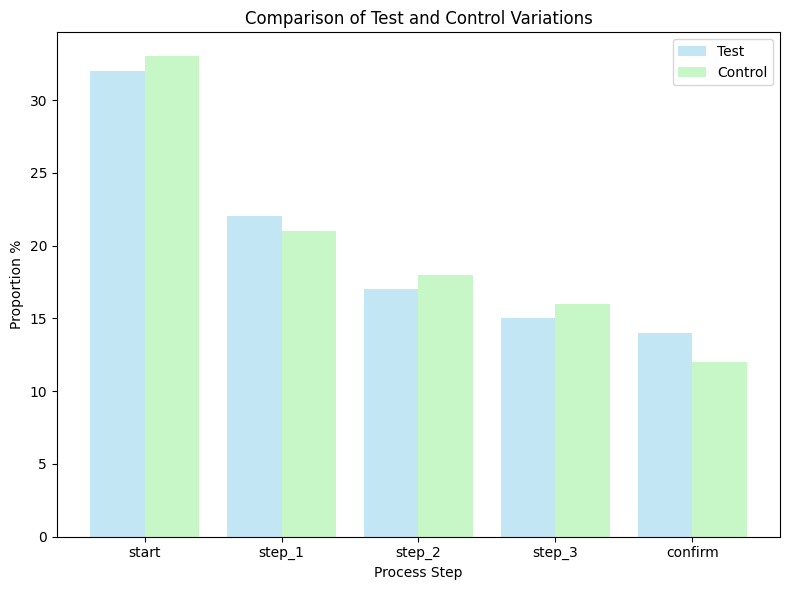

In [93]:

plt.figure(figsize=(8, 6))

bar_width = 0.4

# x-coordinates for the bars
x_test = np.arange(len(navigation_table_test))
x_control = x_test + bar_width 

# Plot for Test 
plt.bar(x_test, navigation_table_test['porportion%'], width=bar_width, color='skyblue', alpha=0.5, label='Test')

# Plot for Control 
plt.bar(x_control, navigation_table_control['porportion%'], width=bar_width, color='lightgreen', alpha=0.5, label='Control')

plt.title('Comparison of Test and Control Variations')
plt.xlabel('Process Step')
plt.ylabel('Proportion %')
plt.legend()
plt.xticks(x_test + bar_width / 2, navigation_table_test.index, rotation=0)  # Set x-axis ticks and labels
plt.tight_layout()
plt.show()


In [94]:

navigation_table2_control= pd.crosstab(index = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Control']["error"],columns="count").sort_values(by ='count', ascending =False)
navigation_table2_control['porportion']=round(navigation_table2_control['count']/web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Control'].error.count(),2)*100
navigation_table2_control.rename(columns={'col_0':'Control_group', 'count':'Frequency'})
navigation_table2_control.rename_axis('Navigation in Control_group', inplace=True)

navigation_table2_test= pd.crosstab(index = web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Test']["error"],columns="count").sort_values(by ='count', ascending =False)
navigation_table2_test['porportion']=round(navigation_table2_test['count']/web_clean_variation_drop_time_error[web_clean_variation_drop_time_error['variation'] == 'Test'].error.count(),2)*100
navigation_table2_test.rename(columns={'col_0': 'Test_group', 'count': 'Frequency'}, inplace=True)
navigation_table2_test.rename_axis('Navigation Test_group', inplace=True)

new_row_names = {
    0.0: 'Forward Navigation',
    1: 'Forward Navigation',
    2: 'Forward Navigation',
    3: 'Forward Navigation',
    4: 'Forward Navigation',
    -1: 'Backward Navigation (1 Step)',
    -2: 'Backward Navigation (2 Steps)',
    -3: 'Backward Navigation (3 Steps)',
    -4: 'Returning from  Confirm to Start'
}

# Renaming the rows 
navigation_table2_test.rename(index=new_row_names, inplace=True)
navigation_table2_control.rename(index=new_row_names, inplace=True)

# Aggregation, rows with the same index
navigation_table2_test = navigation_table2_test.groupby(level=0).sum()
navigation_table2_control = navigation_table2_control.groupby(level=0).sum()

display(navigation_table2_control)
display(navigation_table2_test)


col_0,count,porportion
Navigation in Control_group,,
Backward Navigation (1 Step),6375,6.0
Backward Navigation (2 Steps),1583,1.0
Backward Navigation (3 Steps),1160,1.0
Forward Navigation,101581,91.0
Returning from Confirm to Start,484,0.0


col_0,Frequency,porportion
Navigation Test_group,,
Backward Navigation (1 Step),11836,8.0
Backward Navigation (2 Steps),1876,1.0
Backward Navigation (3 Steps),2279,2.0
Forward Navigation,124367,88.0
Returning from Confirm to Start,239,0.0


# A/B Testing 

### A/B Testing Completion Rate 

In [52]:
completion_rate_table

,variation,total_clients,num_clients_confirm,num_clients_fail,completion_rate
0,Control,23527,15429,8098,65.58
1,Test,26961,18682,8279,69.29


#### Two-proportion, two-sided Z-Test

$$H_{0}: p_{1} - p_{2} = 0$$
$$H_{1/a}: p_{1} - p_{2} \neq 0 $$


In [95]:

# Ratios 
p2 = 15429 / 23527  # Control group
p1 = 18682 / 26961  # Test group

# Total number 
n2 = 23527  # Control group
n1 = 26961  # Test group

# Overall proportion of customers who reached the confirmation step
#p = (15429 + 18682) / (23527 + 26961)

count = np.array([18682, 15429])
nobs = np.array([26961, 23527])
alternative = 'two-sided'
z_stat, p_val = proportions_ztest(count, nobs, alternative=alternative, prop_var=False)

print("Two-Sided Two-Proportion Z-test Results:")
print("Z-statistic:", z_stat)
print("P-value:", p_val)

alpha = 0.05/2
if p_val < alpha:
    print("There is a significant difference in completion rates between the Test and Control groups.")
else:
    print("There is no significant difference in completion rates between the Test and Control groups.")


Two-Sided Two-Proportion Z-test Results:
Z-statistic: 8.889390699380462
P-value: 6.144491429497383e-19
There is a significant difference in completion rates between the Test and Control groups.


#### Two-proportion, one-sided Z-Test

$$H_{0}: p_{1} - p_{2}*0.05 \le 0$$
$$H_{1/a}: p_{1} - p_{2}*0.05 \gt 0 $$
$$ z = \frac{(p_{1} - p_{2})}{\sqrt{p(1-p) \left (\frac{1}{n_{1}} + \frac{1}{n_{2}}\right ) }}$$
$$p_{1} = \frac{x_{1}}{n_{1}}; p_{2} = \frac{x_{2}}{n_{2}}$$
$$p=\frac{(x_{1}+x_{2})}{(n_{1} + n_{2})}$$

In [54]:
#Completion Rate with a Cost-Effectiveness Threshold of 5%

# Ratios
p2 = (15429 / 23527)*0.05  # Control group
p1 = 18682 / 26961  # Test group

# Total number 
n2 = 23527*0.05  # Control group
n1 = 26961  # Test group

c1=15429*0.05 #Control group

# Z-test
count = np.array([18682, c1])
nobs = np.array([26961, n2])
alternative = 'larger'
z_stat, p_val = proportions_ztest(count, nobs, alternative=alternative, prop_var=False)

print("One-Sided Two-Proportion Z-test Results:")
print("Z-statistic:", z_stat)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("The completion rate for the Test group is significantly greater than the completion rate for the Control group.")
else:
    print("The completion rate for the Test group is not significantly greater than the completion rate for the Control group.")


One-Sided Two-Proportion Z-test Results:
Z-statistic: 2.698442611277579
P-value: 0.0034832374126953676
The completion rate for the Test group is significantly greater than the completion rate for the Control group.


In [96]:
# wihtout a Cost-Effectiveness Threshold

# Ratios
p2 = (15429 / 23527)  # Control group
p1 = 18682 / 26961  # Test group

# Total number 
n2 = 23527  # Control group
n1 = 26961  # Test group

# Overall proportion of customers who reached the confirmation step
#p = (15429 + 18682) / (23527 + 26961)


# Z-test
count = np.array([18682, 15429])
nobs = np.array([26961, 23527])
alternative = 'larger'
z_stat, p_val = proportions_ztest(count, nobs, alternative=alternative, prop_var=False)

print("One-Sided Two-Proportion Z-test Results:")
print("Z-statistic:", z_stat)
print("P-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("The completion rate for the Test group is significantly greater than the completion rate for the Control group.")
else:
    print("The completion rate for the Test group is not significantly greater than the completion rate for the Control group.")


One-Sided Two-Proportion Z-test Results:
Z-statistic: 8.889390699380462
P-value: 3.0722457147486916e-19
The completion rate for the Test group is significantly greater than the completion rate for the Control group.


### A/B Testing -  Avg Time Per Step


$$ H_{0}: AvgTimeNew - AvgTimeOld = 0 $$
$$ H_{1/a}: AvgTimeNew - AvgTimeOld \neq 0 $$

**Null Hypothesis**: The mean time for the test group per step and the mean of total time for the process is equal to the mean time for the control group.
<br>**Alternative Hypothesis**: he mean time for the test group per step and the mean of total time for the process is not equal to the mean time for the control group.


**Selection of the Test**
<br>For the comparison of average time spent between the two design groups (comparing the means of a continuous variable between these groups) the **Two Sample T-test**. This test allows to evaluate whether there is a significant difference in the means of two groups. As we perform a t-test with unequal sample sizes, we as well consider the unequal variances ( equal_var=False)


#### Std and mean of each group 

In [97]:
print('The average time spent on each step in the test group:')
display(time_mean_test)
mean_Totaltime_test = time_mean_test.iloc[0]+time_mean_test.iloc[1]+time_mean_test.iloc[2]+time_mean_test.iloc[3]
print ('Average time spent on the whole process for the test group in second is :',mean_Totaltime_test )
print('\nStd per step:' )
display(std_mean_test)
std_Totaltime_test = time_mean_test.Test_AvgTimeSeconds.std()
print ('Std of the time spent on the whole process for control group is :', std_Totaltime_test)

print('\n')
print('The average time spent on each step in the control group:')
display(time_mean_control)

mean_Totaltime_control = time_mean_control.iloc[0]+time_mean_control.iloc[1]+time_mean_control.iloc[2]+time_mean_control.iloc[3]
print ('Average time spent on the whole process for the control group in second is :',mean_Totaltime_control)
print('\nStd per step:')
display(std_mean_control)
std_Totaltime_ctl = time_mean_control.Control_AvgTimeSeconds.std()
print ('Std of the time spent on the whole process for control group is :', std_Totaltime_ctl)


The average time spent on each step in the test group:


,Test_AvgTimeSeconds
process_step,
start,47.094759
step_1,52.439394
step_2,91.188150
step_3,119.983001


Average time spent on the whole process for the test group in second is : Test_AvgTimeSeconds    310.705305
dtype: float64

Std per step:


,Test_StdTime
process_step,
start,117.262308
step_1,85.906634
step_2,97.281597
step_3,190.638077


Std of the time spent on the whole process for control group is : 34.37324127001619


The average time spent on each step in the control group:


,Control_AvgTimeSeconds
process_step,
start,50.317764
step_1,45.736509
step_2,97.065854
step_3,136.174075


Average time spent on the whole process for the control group in second is : Control_AvgTimeSeconds    329.294202
dtype: float64

Std per step:


,Control_StdTime
process_step,
start,116.806644
step_1,104.498973
step_2,187.061485
step_3,186.369216


Std of the time spent on the whole process for control group is : 42.74028729475786


#### Ttest for each step

In [98]:


alpha = 0.05 / 2  # For a two-tailed test
sample_size_test = 26961
sample_size_control = 23527

# Test group meand and std:

test_means = {
    'start': 47.094759,
    'step_1': 52.439394,
    'step_2': 91.188150,
    'step_3': 119.983001
}

test_std = {
    'start': 117.262308,
    'step_1': 85.906634,
    'step_2': 97.281597,
    'step_3': 190.638077
}


# Control group mean and std:
control_means = {
    'start': 50.317764,
    'step_1': 45.736509,
    'step_2': 97.065854,
    'step_3': 136.174075
}

# Control group standard deviation
control_std = {
    'start': 116.806644,
    'step_1': 104.498973,
    'step_2': 187.061485,
    'step_3': 186.369216
}

#  two-sample t-test for each step
test_results = {}
for step in test_means:
    t_statistic, p_val = st.ttest_ind_from_stats(mean1=test_means[step], std1=test_std[step], nobs1=sample_size_test,
                                                 mean2=control_means[step], std2=control_std[step], nobs2=sample_size_control,
                                                 equal_var=False)
    test_results[step] = {'t_statistic': t_statistic, 'p_value': p_val}

# Calculate critical value
critical_value = st.t.ppf(1 - alpha, min(sample_size_test - 1, sample_size_control - 1))

# Print results
for step, result in test_results.items():
    print(f"\nStep: {step}")
    print(f"  Test Statistic: {result['t_statistic']}")
    print(f"  p-value: {result['p_value']}")
    if abs(result['t_statistic']) > critical_value:
        print("  Conclusion: Reject the null hypothesis. There is sufficient evidence to suggest a difference in mean times between test and control groups.")
    else:
        print("  Conclusion: Fail to reject the null hypothesis. There is not sufficient evidence to suggest a difference in mean times between test and control groups.")
print(f"\nCritical Value: {critical_value}")



Step: start
  Test Statistic: -3.087173541694106
  p-value: 0.002021809660963678
  Conclusion: Reject the null hypothesis. There is sufficient evidence to suggest a difference in mean times between test and control groups.

Step: step_1
  Test Statistic: 7.803152514215429
  p-value: 6.165868404749195e-15
  Conclusion: Reject the null hypothesis. There is sufficient evidence to suggest a difference in mean times between test and control groups.

Step: step_2
  Test Statistic: -4.3350719211649364
  p-value: 1.461274798360965e-05
  Conclusion: Reject the null hypothesis. There is sufficient evidence to suggest a difference in mean times between test and control groups.

Step: step_3
  Test Statistic: -9.634294996079408
  p-value: 5.9865805802309965e-22
  Conclusion: Reject the null hypothesis. There is sufficient evidence to suggest a difference in mean times between test and control groups.

Critical Value: 1.9600648257883964


#### Ttest for the whole process

In [58]:

alpha = 0.05 / 2  # For a two-tailed test
sample_size_test = 26961
sample_size_control = 23527



t_statistic, p_val = st.ttest_ind_from_stats(mean1= mean_Totaltime_test, std1= std_Totaltime_test, nobs1=sample_size_test, mean2 = mean_Totaltime_control, std2 = std_Totaltime_ctl, nobs2=sample_size_control,equal_var=False)

test_results[step] = {'t_statistic': t_statistic, 'p_value': p_val}

# Calculate critical value
critical_value = st.t.ppf(1 - alpha, min(sample_size_test - 1, sample_size_control - 1))

print(f"  Test Statistic: {result['t_statistic']}")
print(f"  p-value: {result['p_value']}")
if abs(result['t_statistic']) > critical_value:
    print("  Conclusion: Reject the null hypothesis. There is sufficient evidence to suggest a difference in mean times between test and control groups.")
else:
    print("  Conclusion: Fail to reject the null hypothesis. There is not sufficient evidence to suggest a difference in mean times between test and control groups.")
print(f"\nCritical Value: {critical_value}")


  Test Statistic: -9.634294996079408
  p-value: 5.9865805802309965e-22
  Conclusion: Reject the null hypothesis. There is sufficient evidence to suggest a difference in mean times between test and control groups.

Critical Value: 1.9600648257883964


### A/B Testing Error


#### Two-proportion, one-sided Z-Test

HO : Error Ratetest - Error Rate control ≥ 0

**Null Hypothesis:** There is no difference or the error rate in the test group is greater than or equal to the error rate in the control group.

HA: Error Ratetest - Error Rate control < 0

**Alternative Hypothesis:** The error rate in the test group is less than the error rate in the control
group.

In [99]:
Error_table

,total_errors_test_group,error_percentage_test_group,total_errors_control_group,error_percentage_control_group
process_step,,,,
confirm,70,0.04,218,0.15
start,0,0.00,0,0.00
step_1,6393,3.60,2494,1.74
step_2,4782,2.69,2166,1.51
step_3,4746,2.67,4240,2.96


In [100]:
# Number of Total steps
total_step_test = 177787
total_step_control= 143420



er_test = [70, 0, 6390, 4782, 4746]
er_control = [218,0, 2494, 2166, 4240]
nobs = np.array([total_step_test, total_step_control])



step1 = np.array([6390, 2494])
z_score, p_value = proportions_ztest(step1, nobs, alternative='smaller')  # One-sided test
print(f"For process step 1: Z-score = {z_score:.2f}, p-value = {p_value:.2f}")
if p_value < 0.05:
    print("  The difference in error rates is statistically significant. Test group has less errors")
else:
    print("  We fail to reject the null hypothesis.")

step2 = np.array([4782, 2166])
z_score, p_value = proportions_ztest(step2, nobs, alternative='smaller')  # One-sided test
print(f"For process step 2: Z-score = {z_score:.2f}, p-value = {p_value:.2f}")
if p_value < 0.05:
    print("  The difference in error rates is statistically significant. Test group has less errors")
else:
    print("  We fail to reject the null hypothesis.")


step3 = np.array([4746, 4240])
z_score, p_value = proportions_ztest(step3, nobs, alternative='smaller')  # One-sided test
print(f"For process step 3: Z-score = {z_score:.2f}, p-value = {p_value:.2f}")
if p_value < 0.05:
    print("  The difference in error rates is statistically significant. Test group has less errors")
else:
    print("  We fail to reject the null hypothesis.")


confirm = np.array([70, 218])
z_score, p_value = proportions_ztest(confirm, nobs, alternative='smaller')  # One-sided test
print(f"For confirm: Z-score = {z_score:.2f}, p-value = {p_value:.2f}")
if p_value < 0.05:
    print("  The difference in error rates is statistically significant. Test group has less errors")
else:
    print("  We fail to reject the null hypothesis.")


For process step 1: Z-score = 31.87, p-value = 1.00
  We fail to reject the null hypothesis.
For process step 2: Z-score = 22.84, p-value = 1.00
  We fail to reject the null hypothesis.
For process step 3: Z-score = -4.90, p-value = 0.00
  The difference in error rates is statistically significant. Test group has less errors
For confirm: Z-score = -10.60, p-value = 0.00
  The difference in error rates is statistically significant. Test group has less errors


#### Two-proportion, two-sided Z-Test:

$$ HO : Error Ratetest - Error Rate control  = 0$$

$$H_1: Error Ratetest - Error Rate control ≠ 0$$

In [101]:

# Ratios 
p2 = 5810 / 23527  # Control group
p1 = 8857 / 26961  # Test group

# Total number 
n2 = 23527  # Control group
n1 = 26961  # Test group



count = np.array([8857, 5810])
nobs = np.array([26961, 23527])
alternative = 'two-sided'
z_stat, p_val = proportions_ztest(count, nobs, alternative=alternative, prop_var=False)

print("Two-Sided Two-Proportion Z-test Results:")
print("Z-statistic:", z_stat)
print("P-value:", p_val)

alpha = 0.05/2
if p_val < alpha:
    print("There is a significant difference in error rates between the Test and Control groups.")
else:
    print("There is no significant difference in error rates between the Test and Control groups.")


Two-Sided Two-Proportion Z-test Results:
Z-statistic: 20.136764271200036
P-value: 3.5156731468604393e-90
There is a significant difference in error rates between the Test and Control groups.


# Experiment Evaluation

1- Was the experiment well-structured?:

The experiment appears to be well-structured as it follows the principles of A/B testing, with clear definitions of the control and test groups, and a consistent process sequence for both groups. However, ambiguity may arises when users reach the confirm step and start another round; it's unclear if this is an error or intentional. Establishing clearer definitions or protocols to interpret such behaviors would enhance the experiment's accuracy and reliability.

2- Duration Assessment:Was the timeframe of the experiment adequate to gather meaningful data and insights?

The duration of the experiment, spanning from 3/15/2017 to 6/20/2017, seems reasonable for gathering meaningful data and insights. however if otherfactors such as seasonality or events which could effect the typical user behavior are considered or not is unclear. 

3- Additional Data Needs What other data, if available, could enhance the analysis?

The test could as well include direct feedback from participants and could  consider if collecting qualitative data through surveys or interviews could provide deeper understanding of the experiment outcomes and help identify factors influencing client responses.

4- Were clients randomly and equally divided between the old and new designs?  Were there any biases?
Baesd on the plots bellow, the both group are relatively large and similar

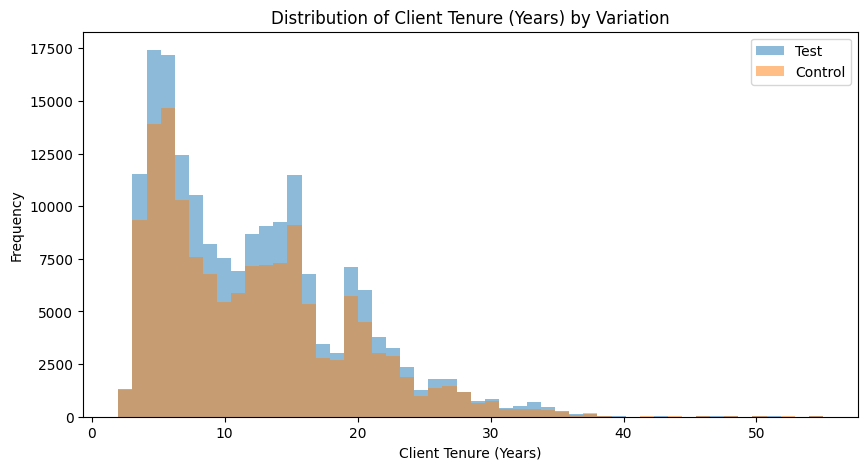

In [312]:
# Define the column to plot
column_to_plot = 'clnt_tenure_yr'

# Plot histograms for clnt_tenure_yr for both Test and Control variations
plt.figure(figsize=(10, 5))

# Histogram for Test variation
plt.hist(df_all_final[df_all_final['variation'] == 'Test'][column_to_plot], bins=50, alpha=0.5, label='Test')

# Histogram for Control variation
plt.hist(df_all_final[df_all_final['variation'] == 'Control'][column_to_plot], bins=50, alpha=0.5, label='Control')

plt.xlabel('Client Tenure (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Client Tenure (Years) by Variation')
plt.legend()
plt.show()


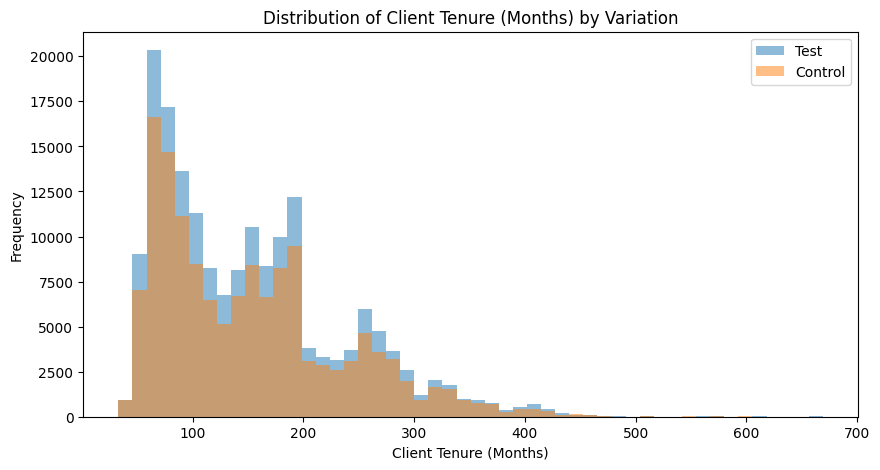

In [314]:
# Define the column to plot
column_to_plot = 'clnt_tenure_mnth'

# Plot histograms for clnt_tenure_mnth for both Test and Control variations
plt.figure(figsize=(10, 5))

# Histogram for Test variation
plt.hist(df_all_final[df_all_final['variation'] == 'Test'][column_to_plot], bins=50, alpha=0.5, label='Test')

# Histogram for Control variation
plt.hist(df_all_final[df_all_final['variation'] == 'Control'][column_to_plot], bins=50, alpha=0.5, label='Control')

plt.xlabel('Client Tenure (Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Client Tenure (Months) by Variation')
plt.legend()
plt.show()


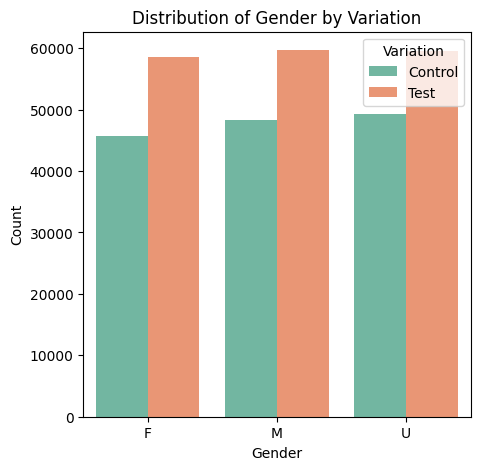

In [315]:

# Plotting both Control and Test variations in one bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x='gendr', y='count', hue='variation', data=df_all_final.groupby(['gendr', 'variation']).size().reset_index(name='count'), palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender by Variation')
plt.legend(title='Variation')
plt.show()


### Conclusion 

- The new digital design has successfully improved the user experience by enhancing completion rates. (69.29% to 65.58% &  Z-test p < 0.001)

- Users in the test group took less time (311 seconds) to complete the process compared to the control group (329 seconds), indicating a smoother and faster user journey.

- The test group had higher error rates in step 1 and 2 (most bacward navigation  step 1) suggesting areas for design improvement to reduce user errors.
